<a href="https://colab.research.google.com/github/ngnepist/BME280_driver/blob/master/seabedClassification_starterCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Programming Exercise 6: <ins>Supervised classification</ins>


## 1. Objectifs


Nous allons dans ce TP classer automatiquement des patchs extraits d'images sonar (cf. figure ci-dessous) en types de fond marin (roches, sables, vases, rides de sable verticales et à 45°, [Posidonie](https://fr.wikipedia.org/wiki/Posidonia_oceanica)).

Quelques exemples de patchs d'image sonar de fond marin:
<img src="screenshot001.png" />


L'objectif est d'écrire un ou plusieurs  scripts permettant de mettre en \oe uvre un système basé sur différentes approches supervisées de machine learning. Ces scripts devront ainsi suivre la chaîne générale décrite en cours (à l'exception de la phase de captation; cf. figure ci-dessous ) :
* prétraitements
* extraction des descripteurs
* apprentissage d'un modèle de classement
* classement des pixels
* évaluation du classifieur appris
* comparaison et analyse des performances de différents classifieurs

<img src="screenshot002.png" />

Le TP est globalement organisé de la manière suivante
**Données**

Il s'agira d'apprendre les classifieurs à partir de descripteurs extraits grâce à un algorithme performant d'analyse de textures appelé [scattering operator](https://www.di.ens.fr/data/scattering) (le fonctionnement exact n'est pas au programme mais il s'apparente à une banque de filtres mise en cascade; à chaque niveau un ou plusieurs descripteurs sont calculés). 
 
**Prétraitements**

Aucun prétraitement ne sera réalisé. 

**Ensembles de données**

Les deux ensembles de données (apprentissage et test) seront composés de 2/3 et 1/3 de la base totale d'images. 

**Algorithmes** 

Concernant les algorithmes supervisés de machine learning, l'objectif est de découvrir le package python [scikit-learn](http://scikit-learn.org/stable/user_guide.html) qui vous permettra d'utiliser les algorithmes de [régression logistique](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [réseaux de neurones](https://scikit-learn.org/stable/modules/neural_networks_supervised.html), [random forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) et [svm](https://scikit-learn.org/stable/modules/svm.html#svm-classification).


 Pour commencer avec cette séance, vous aurez besoin de **télécharger** le _starter code_  disponible sur le lien Moodle du cours.

**Travail demandé**

<span style="color:red">**Dans cet exercice, il vous est demandé de fournir un seul rapport regroupant les réponses aux questions, vos analyses et vos codes. Ce rapport pourra prendre la forme d'un pdf ou d'un jupyter notebook. Il est de plus conseillé de faire tourner les codes sur google colab si votre machine manque de puissance (dans ce cas un jupyter notebook est nécessaire). Il est également conseillé de répondre aux questions par des phrases pour obtenir la totalité des points**</span>


## Fichiers inclus dans le starter code pour cette séance
* **usefulCmdsAndFcns.py** - quelques commandes et functions pour faciliter l'import des patchs, leur affichage et l'évaluation des performances des classifieurs

* **dataSet** - répertoire avec les images et les labels correspondants
* **dataSet\imdb_200x200_SmallSonarTex_db_6classes_scatValOnly_kymatio_j1_l4.mat** - fichier matlab contenant les descripteurs extraits des images par le scattering operator



# 2. Découverte des données

## 2.1 Imports des packages python

**<ins>Question 1:</ins>**

Écrire des lignes de code permettant d'importer les packages python utiles.


_Your commented code below_

In [1]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

## 2.2 Chargement et examen des données

**<ins>Question 2:</ins>** Écrire des lignes de code permettant:
* de charger les données comprises dans le fichier **labels.csv**,
* d'afficher les images avec la fonction **plot\_batch()** du fichier **usefulCmdsAndFcns.py**,
* de mettre en matrice les descripteurs extraits par le scattering operator à partir de l'ensemble de la base d'images



_Your commented code below_

(360, 217)


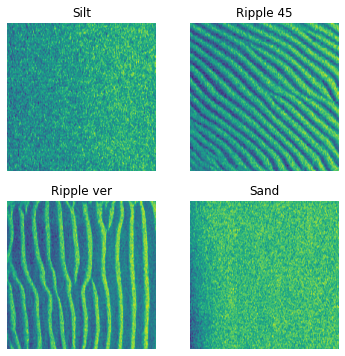

In [2]:
from usefulCmdsAndFcns import *
%matplotlib inline

feature_type = 'scat'  # 'raw' | 'scat'
feature_values, label_names, dataset_df = importData(feature_type)

images_df = load_batch(dataset_df)

plot_batch(images_df, 2, 2, 200, 200)


**<ins>Question 3: </ins>** 
* Quel est le nombre de données/individus/images, le nombre de descripteurs?
* Quelle est la dynamique des données?

**Nous constatons qu'il y'a 360 image dans l'emsemble de données. le traitement par l'analyseur de texture "scattering operator" nous renvoie 217 descripteurs. Les données sont dynamiques car changes**

**Pour l'argument 'raw' on a 40 000 descripteurs**  

## 3. Traitements

## 3.1 Normalisation des descripteurs 

**<ins>Question 4:</ins>**

Écrire des lignes de code permettant de [normaliser](https://scikit-learn.org/stable/modules/preprocessing.html) les données si besoin.


_Your commented code below_

In [3]:
#Normalisation mean = 0 std = 1 : 
scaler = preprocessing.StandardScaler().fit(feature_values)
feature_values_scaled = scaler.transform(feature_values)
#print(feature_values_scaled.mean(axis=0))


**<ins>Question 5</ins>**: Pourquoi doit-on faire cette normalisation?

**La normalisation permet une mise à l'échelle, de nos donnés. Ceci diminue le risque de biais dans le calcul des poids.**



## 3.2 Séparation des données en ensembles 

**<ins>Question 6:</ins>**

Écrire des lignes de code permettant de [créer deux ensembles](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split): un pour l'apprentissage et un pour le test en proportions 2/3-1/3.


_Your commented code below_

In [4]:
X_train, X_test, y_train, y_test = train_test_split(feature_values_scaled, label_names, test_size=0.33, random_state=42)

**<ins>Question 7:</ins>** Pourquoi doit-on faire cela?

**Nous devons avoir un ensemble d'apprentissage, qui va nous permettre de trouver les parametres de prédiction, et un ensemble de test qui va nous permettre d'évaluer notre fonction de prédiction.**


## 3.3 Gestion des labels

**<ins>Question 8:</ins>** Écrire des lignes de code permettant de disposer des labels pour chaque ensemble de données dans différents [codages](https://scikit-learn.org/stable/modules/preprocessing_targets.html) (noms, indices, [one-hot-encoding](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features), etc.) 


_Your commented code below_

In [5]:
# Récupération des labels
label_names_train = y_train
label_names_unique_train = label_names_train.unique()

label_names_test = y_test
label_names_unique_test = label_names_test.unique()


#  transformation des labels selon différents codages

# indices
le_train = preprocessing.LabelEncoder()
le_train.fit(label_names_unique_train)
labelIndices_unique_train = le_train.transform(label_names_unique_train)
labelIndices_train = le_train.transform(label_names_train)

le_test = preprocessing.LabelEncoder()
le_test.fit(label_names_unique_test)
labelIndices_unique_test = le_test.transform(label_names_unique_test)
labelIndices_test = le_test.transform(label_names_test)

# enc indices to  one-hot-encoding
encInd2Ohe_train = preprocessing.OneHotEncoder(sparse=False)
encInd2Ohe_train.fit(labelIndices_unique_train.reshape(-1, 1))
labelOhe_train = encInd2Ohe_train.transform(labelIndices_train.reshape(-1, 1))

encInd2Ohe_test = preprocessing.OneHotEncoder(sparse=False)
encInd2Ohe_test.fit(labelIndices_unique_test.reshape(-1, 1))
labelOhe_test = encInd2Ohe_test.transform(labelIndices_test.reshape(-1, 1))

# enc labelNames to  one-hot-encoding
encName2Ohe_train = preprocessing.OneHotEncoder(sparse=False)
encName2Ohe_train.fit(label_names_unique_train.reshape(-1, 1))
labelOhe2_train = encName2Ohe_train.transform(label_names_train.reset_index(drop=True).values.reshape(-1, 1))

encName2Ohe_test = preprocessing.OneHotEncoder(sparse=False)
encName2Ohe_test.fit(label_names_unique_test.reshape(-1, 1))
labelOhe2_test = encName2Ohe_test.transform(label_names_test.reset_index(drop=True).values.reshape(-1, 1))

# one-hot-encoding avec pandas
label_ohe_train = pd.get_dummies(label_names_train.reset_index(drop=True)).values

label_ohe_test = pd.get_dummies(label_names_test.reset_index(drop=True)).values

**<ins>Question 9:</ins>** Etudiez la répartition du nombre de données (d'images) en fonction du <ins>type de fonds marins pour chaque ensemble de données</ins>. Est-ce important? Pourquoi?

_Your commented code below_


In [6]:
from collections import Counter
cnt_train = Counter(label_names_train.to_numpy())
print("Train repartitions is : \n", cnt_train)
cnt_test = Counter(label_names_test.to_numpy())
print("Test repartitions is : \n", cnt_test)

Train repartitions is : 
 Counter({'Silt': 46, 'Rock': 43, 'Posidonia': 39, 'Ripple vertical': 39, 'Sand': 38, 'Ripple 45': 36})
Test repartitions is : 
 Counter({'Ripple 45': 24, 'Sand': 22, 'Posidonia': 21, 'Ripple vertical': 21, 'Rock': 17, 'Silt': 14})


**On constate que les deux ensembles contienent les différents type d'images et à des proportions sensiblement égales. Ceci est importants car il pemert de faire en sorte que tout les types d'image contribue à la determination de la fonction de prédiction.**



## 4. Approche supervisée à partir des descripteurs du scattering operator

## 4.1 Apprentissage des classifieurs


**<ins>Question 10:</ins>** Faire la liste expliquée des hyper-paramètres (paramètre uniquement lié à l'algorithme d'apprentissage) les plus importants des algorithmes: régression logistique, réseaux de neurones, svm et random forest.

* Regression logistique : Déterminer w et w 0 maximisant : p (C 1 |x) = σ (w.T x + w 0)

* Réseaux de neurones : l’ensemble des hyper-paramètres est : θ = {W (1) , b (1) , . . . , W (L+1) , b (L+1) }. avec W(i) et b(i) le poids et le biais qui relient deux couches.

* SVM : Hyper-paramètre : C > 0 pour une séparation linéaire
I plus C est petit, plus la capacité diminue (peu de pénalisation des erreurs)
I plus C est grand, plus le risque d’overfitting est grand. 

> Hyper-paramètre supplémentaire, le noyau φ et ses paramètres (moyenne et variance si gaussienne) si séparation non linéaire.

* Random forest : 










**<ins>Question 11</ins>**: Réalisez l'apprentissage successif des modèles: régression logistique, réseaux de neurones, svm et random forest en utilisant les fonctions du package scikit-learn. Les valeurs des hyper-paramètres seront choisis comme les valeurs par défaut de scikit-learn.

_Your commented code below_


In [7]:
from sklearn.linear_model import LogisticRegression
clf_Regression = LogisticRegression()
# clf_Regression.fit(X_train, label_names_train)
# clf_Regression.score(X_test, label_names_test)
prediction_Regression = train_predict_model(clf_Regression, X_train, labelIndices_train, X_test, labelIndices_test )
prediction_Regression

array([4, 0, 5, 2, 0, 5, 0, 0, 5, 3, 3, 2, 4, 2, 1, 3, 4, 2, 3, 2, 3, 4,
       2, 0, 5, 4, 3, 2, 0, 1, 5, 0, 2, 3, 1, 0, 0, 2, 1, 1, 4, 0, 2, 1,
       3, 4, 0, 0, 0, 2, 5, 4, 4, 1, 2, 5, 0, 1, 1, 5, 0, 0, 4, 1, 1, 1,
       2, 4, 2, 1, 4, 4, 5, 2, 4, 1, 4, 2, 0, 1, 3, 0, 4, 3, 2, 2, 3, 3,
       1, 5, 1, 1, 5, 1, 4, 4, 0, 3, 0, 1, 2, 4, 4, 3, 3, 4, 2, 5, 3, 5,
       3, 4, 0, 5, 5, 3, 0, 2, 1])

In [8]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier()
# clf_NN.fit(X_train, label_ohe_train)
# clf_NN.score(X_test, label_ohe_test)
prediction_NN = train_predict_model(clf_NN, X_train, labelIndices_train, X_test, labelIndices_test ) #X_train, label_ohe_train, X_test, label_ohe_test )


In [9]:
from sklearn import svm
clf_SVC = svm.SVC()
# clf_SVC.fit(X_train, label_names_train)
# clf_SVC.score(X_test, label_names_test)
prediction_SVM = train_predict_model(clf_SVC, X_train, labelIndices_train, X_test, labelIndices_test )# X_train, label_names_train, X_test, label_names_test )


In [10]:
from sklearn.ensemble import RandomForestClassifier
clf_RandomForest = RandomForestClassifier()
# clf_RandomForest = clf.fit(X_train, label_names_train)
# clf_RandomForest.score(X_test, label_names_test)
prediction_RandomForest = train_predict_model(clf_RandomForest,X_train, labelIndices_train, X_test, labelIndices_test )# X_train, label_names_train, X_test, label_names_test )


**Le score des classificateurs sont pratiquement les memes. sauf celui du random forest qui est légèrement plus bas.**

## 4.2 Evaluation des classifieurs

**<ins>Question 12</ins>:** A l'aide des fonctions fournies, évaluer les modèles appris en calculant et en affichant la matrice de confusion, puis les métriques extraites. Il est à noter que le jeu de données est petit et vous compléterez donc avec une évaluation par [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html\#computing-cross-validated-metrics) de la moyenne et de l'écart-type de la métrique accuracy. Conclure sur les performances par classe et globales des différents classifieurs.


_Your commented code below_

In [11]:
from sklearn.model_selection import cross_val_score
print("matrice de confusion de la Regresion Logistique : ")
display_confusion_matrix(labelIndices_test, prediction_Regression)
get_metrics(labelIndices_test, prediction_Regression)
scores = cross_val_score(clf_Regression,X_test, labelIndices_test)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

print("\nmatrice de confusion du réseau de neurone : ")
display_confusion_matrix(labelIndices_test, prediction_NN)
get_metrics(labelIndices_test, prediction_NN)
scores = cross_val_score(clf_NN,X_test, labelIndices_test)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

print("\nmatrice de confusion de la SVM : ")
display_confusion_matrix(labelIndices_test, prediction_SVM)
get_metrics(labelIndices_test, prediction_SVM)
scores = cross_val_score(clf_SVC,X_test, labelIndices_test)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

print("\nmatrice de confusion de la Random Forest : ")
display_confusion_matrix(labelIndices_test, prediction_RandomForest)
get_metrics(labelIndices_test, prediction_RandomForest)
scores = cross_val_score(clf_RandomForest,X_test, labelIndices_test)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

matrice de confusion de la Regresion Logistique : 
          Predicted:    
                   1   0
Actual: 1         21   1
        0          0  21
Accuracy: 0.9748
Precision: 0.9762
Recall: 0.9748
F1 Score: 0.9743
0.96 accuracy with a standard deviation of 0.05

matrice de confusion du réseau de neurone : 
          Predicted:    
                   1   0
Actual: 1         21   0
        0          0  21
Accuracy: 0.9748
Precision: 0.9771
Recall: 0.9748
F1 Score: 0.9746
0.94 accuracy with a standard deviation of 0.04

matrice de confusion de la SVM : 
          Predicted:    
                   1   0
Actual: 1         21   0
        0          0  21
Accuracy: 0.9748
Precision: 0.9792
Recall: 0.9748
F1 Score: 0.9752
0.87 accuracy with a standard deviation of 0.05

matrice de confusion de la Random Forest : 
          Predicted:    
                   1   0
Actual: 1         21   1
        0          0  21
Accuracy: 0.9412
Precision: 0.9433
Recall: 0.9412
F1 Score: 0.9409
0.89 accura

**On constate que le nombre de faux-vrai et de faux-faux est relativement faible par rapport au nombre de vrai-vrai et de vrai-faux.
On remarque que les indicateurs du réseau de neurone son plus satisfaisant que les autres. notament, on a zero faux vrai et zero faux faux.
Au contraire, le random forest a les plus faibles indicateurs.**

**En ce qui concerne la cross validation, le reseau deneurone affiche un écart type le plus faiblle, ce qui laisserait penser que c'est le meilleur model de prédictions**


## 4.2 Optimisation de l'apprentissage (choix des hyper-paramètres)

Le jeu de données étant très petit, la valeur des hyper-paramètres doit être fixée de manière optimale en évaluant les modèles par cross validation sur l'ensemble de training.

**<ins>Question 13</ins>:** Lisez le [tutoriel suivant](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html) en faisant particulièrement attention à la façon dont est gérée la détermination des hyperparamètres et l'évaluation des performances. Reproduisez cette méthodologie en testant différents nombres de plis (fold):
* pour la **<ins>Régression logistique:</ins>**:
    * C: 0.001, 0.01,0.1,1,10
    * penalty = 'l1', 'l2', 'elasticnet', 'none'
    
* pour le **<ins>réseau de neurones</ins>:**
    * hidden_layer_sizes: une couche de 100 neurones, 2 couches de 100 neurones, 3 couches de 100 neurones
    * activation: 'logistic', 'tanh', 'relu'
    * alpha: 0.0001, 0.001, 0.01, 0.1, 1, 10

* pour le **<ins>Random Forest</ins>:**
    * n_estimators: 1, 10, 100, 500, 1000
    * max_depth: 5, 10, 20
    * min_samples_leaf: 1, 5, 10

* pour le **<ins>SVM</ins>:**
    * kernel: 'rbf' 
    * C: 1e3, 5e3, 1e4, 5e4, 1e5, 1e6
    * gamma: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.5


_Your commented code below_

In [12]:
from sklearn.model_selection import GridSearchCV
#Regression logistique

# Set the parameters by cross-validation
tuned_parameters = [{"penalty": ['l1', 'l2', 'elasticnet', 'none'], "C": [0.001, 0.01,0.1,1,10]}]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, labelIndices_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = labelIndices_test, clf.predict(X_test)
    display_classification_report(y_true,y_pred)
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'penalty': 'l2'}

Grid scores on development set:

nan (+/-nan) for {'C': 0.001, 'penalty': 'l1'}
0.779 (+/-0.172) for {'C': 0.001, 'penalty': 'l2'}
nan (+/-nan) for {'C': 0.001, 'penalty': 'elasticnet'}
0.960 (+/-0.070) for {'C': 0.001, 'penalty': 'none'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1'}
0.944 (+/-0.076) for {'C': 0.01, 'penalty': 'l2'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'elasticnet'}
0.960 (+/-0.070) for {'C': 0.01, 'penalty': 'none'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'l1'}
0.957 (+/-0.068) for {'C': 0.1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'elasticnet'}
0.960 (+/-0.070) for {'C': 0.1, 'penalty': 'none'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1'}
0.964 (+/-0.070) for {'C': 1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1, 'penalty': 'elasticnet'}
0.960 (+/-0.070) for {'C': 1, 'penalty': 'none'}
nan (+/-nan) for {'C': 10, 'penalty': 'l1'}
0.970 (+/-0

In [13]:
#Réseau de Neurone

# Set the parameters by cross-validation
tuned_parameters = [{"hidden_layer_sizes": [(100), (100,100), (100,100,100)],
                     "activation": ['logistic', 'tanh', 'relu'], 
                     "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}]
scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, labelIndices_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = labelIndices_test, clf.predict(X_test)
    display_classification_report(y_true,y_pred)
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (100, 100)}

Grid scores on development set:

0.945 (+/-0.055) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 100}
0.955 (+/-0.064) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}
0.954 (+/-0.057) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100)}
0.945 (+/-0.055) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 100}
0.953 (+/-0.065) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}
0.959 (+/-0.049) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100)}
0.945 (+/-0.055) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': 100}
0.955 (+/-0.064) for {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}
0.965 (+/-0.039) for {'activation':

In [14]:
#Random Forest

# Set the parameters by cross-validation
tuned_parameters = [{"n_estimators": [1, 10, 100, 500, 1000], 
                     "max_depth": [5, 10, 20],
                     "min_samples_leaf": [1, 5, 10]}]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, labelIndices_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = labelIndices_test, clf.predict(X_test)
    display_classification_report(y_true,y_pred)
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}

Grid scores on development set:

0.860 (+/-0.081) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 1}
0.948 (+/-0.039) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 10}
0.926 (+/-0.057) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
0.931 (+/-0.044) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 500}
0.931 (+/-0.044) for {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 1000}
0.866 (+/-0.116) for {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 1}
0.915 (+/-0.037) for {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 10}
0.913 (+/-0.041) for {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 100}
0.924 (+/-0.057) for {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 500}
0.921 (+/-0.040) for {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 1000}


In [15]:
#SVM

# Set the parameters by cross-validation
tuned_parameters = [{"kernel": ['rbf'], 
                     "C": [1e3, 5e3, 1e4, 5e4, 1e5, 1e6],
                     "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.5]}]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, labelIndices_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = labelIndices_test, clf.predict(X_test)
    display_classification_report(y_true,y_pred)
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

0.972 (+/-0.044) for {'C': 1000.0, 'gamma': 0.0001, 'kernel': 'rbf'}
0.976 (+/-0.025) for {'C': 1000.0, 'gamma': 0.0005, 'kernel': 'rbf'}
0.976 (+/-0.025) for {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}
0.979 (+/-0.032) for {'C': 1000.0, 'gamma': 0.005, 'kernel': 'rbf'}
0.985 (+/-0.015) for {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.956 (+/-0.039) for {'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.615 (+/-0.188) for {'C': 1000.0, 'gamma': 0.5, 'kernel': 'rbf'}
0.979 (+/-0.032) for {'C': 5000.0, 'gamma': 0.0001, 'kernel': 'rbf'}
0.976 (+/-0.025) for {'C': 5000.0, 'gamma': 0.0005, 'kernel': 'rbf'}
0.976 (+/-0.025) for {'C': 5000.0, 'gamma': 0.001, 'kernel': 'rbf'}
0.979 (+/-0.032) for {'C': 5000.0, 'gamma': 0.005, 'kernel': 'rbf'}
0.985 (+/-0.015) for {'C': 5000.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.956 (+/-0.039) f

**Nous nous sommes interressés ici à deux critère de selection :  la precision et le recall**

**<ins>Question 14</ins>:** Dans le cas d'un jeu de données de grande taille, comment se passe ce choix des hyper-paramètres ?

Dans le cas d'un grand nombre de données, il suffit d'utiliser la méthode Hold out.Pas besoin de cros validation. On divise notre jeu de données en deux ensembles. un d'apprentissage et un autre de test. et on utidie la variation des parametres, notament à travers les erreurs de prédiction et d'apprentissage.  


**<ins>Question 15</ins>:** Évaluer les résultats et donner la valeur des paramètres optimaux pour chaque classifieur.

_Your commented code below_

**Comme vous l'avez constaté, les codes ci dessous nous donnes déja les paramètres optimaux. En prenant comme critère de sélection la précision, on a** 
- Pour la Regression Logistique : {'C': 10, 'penalty': 'l2'}
- Pour le réseau de neurone : {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}
- Pour la Random Forest : {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 10}
- Pour la SVM : {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}


**<ins>Question 16</ins>:** Apprendre le modèle final pour chaque classifieur avec les paramètres optimaux et évaluer correctement leurs performances.


_Your commented code below_

In [16]:
#Regression logistique
print("\n\n------------------ case of LOGISTIC REGRESION ------------------")
clf_Regression = LogisticRegression(penalty='l2',C=10)
prediction_Regression = train_predict_model(clf_Regression, X_train, labelIndices_train, X_test, labelIndices_test )
display_model_performance_metrics(labelIndices_test,prediction_Regression)
#Réseau de neurone
print("\n\n------------------- case of NEURAL NETWORK -----------------------")
clf_NN = MLPClassifier(hidden_layer_sizes=(100,100),activation='tanh',alpha=0.1)
prediction_NN = train_predict_model(clf_NN, X_train, labelIndices_train, X_test, labelIndices_test ) #X_train, label_ohe_train, X_test, label_ohe_test )
display_model_performance_metrics(labelIndices_test,prediction_NN)
#Random Forest
print("\n\n------------------- case of RADOMFOREST -------------------------")
clf_RandomForest = RandomForestClassifier(max_depth=20,min_samples_leaf=1,n_estimators=10)
prediction_RandomForest = train_predict_model(clf_RandomForest,X_train, labelIndices_train, X_test, labelIndices_test )# X_train, label_names_train, X_test, label_names_test )
display_model_performance_metrics(labelIndices_test,prediction_RandomForest)
#SVM
print("\n\n---------------------- case of SVM ---------------------------")
clf_SVC = svm.SVC(C=1000.0,gamma=0.01,kernel='rbf')
prediction_SVM = train_predict_model(clf_SVC, X_train, labelIndices_train, X_test, labelIndices_test )# X_train, label_names_train, X_test, label_names_test )
display_model_performance_metrics(labelIndices_test,prediction_SVM)




------------------ case of LOGISTIC REGRESION ------------------
Model Performance metrics:
------------------------------
Accuracy: 0.9916
Precision: 0.9921
Recall: 0.9916
F1 Score: 0.9916

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           0       1.00      1.00      1.00        21

   micro avg       1.00      0.98      0.99        45
   macro avg       1.00      0.98      0.99        45
weighted avg       1.00      0.98      0.99        45


Prediction Confusion Matrix:
------------------------------
          Predicted:    
                   1   0
Actual: 1         23   0
        0          0  21


------------------- case of NEURAL NETWORK -----------------------
Model Performance metrics:
------------------------------
Accuracy: 0.9916
Precision: 0.9921
Recall: 0.9916
F1 Score: 0.9916

Model Classification report:
------------------------------
    

**On remarque que les performmances sont meilleurs comparées aux classificateurs précédents. Ceci est du fait de l'utilisation des hyper paramètres optimaux**


# 5. Analyse finale

**<ins>Question 16</ins>:** Faites une synthèse des résultats obtenus. Dresser en particulier des conclusions en fonction des descripteurs utilisés (si vous avez fait la partie optionnelle 7), des algorithmes utilisés (et leurs caractéristiques) et des prétraitements effectués.

**On constate que les descripteurs 'raw' sont largement moins performant que ceux de 'scat'. On peut donc dire que c'est la qualité des descripteur qui importe le plus et nom le nombre de ceux ci.** 

# 6. Diagramme fonctionnel

_Double cliquez ici pour écrire votre réponse ici!_


**<ins>Question 17</ins>:** Réalisez un diagramme fonctionnel décrivant le flux des données tout au long de l'approche supervisée. Ce diagramme devra faire apparaître au minimum: les trois ensembles d'images, les descripteurs, les différents algorithmes d'apprentissage, l'évaluation (mettre une image dans le répertoire courant et dans la cellule ci-dessous remplacer par le nom du fichier)

_Your image here_ <img src="fichierDiagramme.png" />

# 7. (Optionnel) Approche supervisée sur données brutes

**<ins>Question 15</ins>:** Réalisez l'apprentissage du classifieur random forest en utilisant les fonctions du package scikit-learn sur les données brutes. Pensez vous qu'un autre classifieur donnerait des meilleurs résultats? Analysez les résultats (décrivez et proposez une interprétation de ce qu'il se passe)

_Your commented code below_

_Double cliquez ici pour écrire votre réponse ici!_
